<a href="https://colab.research.google.com/github/marcelagudelo/math_gap_saber11_2020_2021/blob/main/women_stem_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cálculo de las brechas de género en el módulo de matemáticas de las pruebas saber 11 en Colombia para los años 2020 y 2021**


---



# Importar datos
[Se importaron los datos del portal del icfes](https://www2.icfes.gov.co/web/guest/investigadores-y-estudiantes-posgrado/acceso-a-bases-de-datos)

*El análisis se centra en los resultados de los semestres 2020-2 y 2021-2*

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
pd.set_option('display.max_rows', None)

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Se cargan los datos como dataframes con la libreria pandas

In [15]:
sb11_20202 = pd.read_csv('/content/drive/MyDrive/wom-en stem project/SB11_20202.txt', delimiter='¬')
sb11_20212 = pd.read_csv('/content/drive/MyDrive/wom-en stem project/SB11_20212.txt', delimiter='¬')

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [16]:
ls

drive/  sample_data/


In [17]:
# Se verifican los datos cargados
display(sb11_20202.head())
display(sb11_20212.head())

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,...,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E
0,TI,COLOMBIA,M,03/07/2003,20204,SB11202040001656,ESTUDIANTE,COLOMBIA,No,CALDAS,...,48.0,61,A1,261,61,61.340840,3.0,3.0,PUBLICAR,NO
1,TI,COLOMBIA,F,16/06/2003,20204,SB11202040001763,ESTUDIANTE,COLOMBIA,No,BOGOTÁ,...,58.0,85,A2,306,87,71.825844,4.0,4.0,PUBLICAR,NO
2,TI,COLOMBIA,F,11/09/2003,20204,SB11202040001490,ESTUDIANTE,COLOMBIA,No,BOGOTÁ,...,51.0,71,A1,321,92,57.286312,3.0,3.0,PUBLICAR,NO
3,TI,COLOMBIA,M,05/03/2004,20204,SB11202040096445,ESTUDIANTE,COLOMBIA,No,BOGOTÁ,...,67.0,94,A2,338,96,67.476602,4.0,4.0,PUBLICAR,NO
4,TI,COLOMBIA,M,30/08/2003,20204,SB11202040048154,ESTUDIANTE,COLOMBIA,No,TOLIMA,...,29.0,1,A-,225,35,43.877158,2.0,2.0,PUBLICAR,GENERACION E - GRATUIDAD


,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,...,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,PERCENTIL_ESPECIAL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E
0,TI,COLOMBIA,F,09/01/2004,20214,SB11202140617020,ESTUDIANTE,COLOMBIA,No,CALDAS,...,6.0,A-,158,2.0,NaN,48.765076,2.0,2.0,PUBLICAR,GENERACION E - GRATUIDAD
1,TI,COLOMBIA,M,06/04/2005,20214,SB11202140623058,ESTUDIANTE,COLOMBIA,No,CALDAS,...,30.0,A-,179,8.0,NaN,47.657176,2.0,2.0,PUBLICAR,NO
2,TI,COLOMBIA,F,28/03/2004,20214,SB11202140623602,ESTUDIANTE,COLOMBIA,No,CALDAS,...,29.0,A-,239,47.0,NaN,37.502857,1.0,1.0,PUBLICAR,NO
3,TI,COLOMBIA,F,28/04/2005,20214,SB11202140622167,ESTUDIANTE,COLOMBIA,No,RISARALDA,...,38.0,A-,232,42.0,NaN,44.092403,2.0,1.0,PUBLICAR,GENERACION E - GRATUIDAD
4,TI,COLOMBIA,F,16/11/2004,20214,SB11202140633564,ESTUDIANTE,COLOMBIA,No,CALDAS,...,55.0,A1,270,69.0,NaN,51.597759,3.0,2.0,PUBLICAR,GENERACION E - GRATUIDAD


In [18]:
# Se realizan análisis iniciales para explorar cantidad de observaciones en cada periodo estudiado
print(sb11_20202.shape)
print(sb11_20212.shape)

(504872, 81)
(532979, 82)


In [19]:
# se verifican las columnas de cada df y los tipos de variables con que se cargó cada columna
sb11_20202.info()
sb11_20212.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504872 entries, 0 to 504871
Data columns (total 81 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ESTU_TIPODOCUMENTO             504872 non-null  object 
 1   ESTU_NACIONALIDAD              504872 non-null  object 
 2   ESTU_GENERO                    504864 non-null  object 
 3   ESTU_FECHANACIMIENTO           504872 non-null  object 
 4   PERIODO                        504872 non-null  int64  
 5   ESTU_CONSECUTIVO               504872 non-null  object 
 6   ESTU_ESTUDIANTE                504872 non-null  object 
 7   ESTU_PAIS_RESIDE               504872 non-null  object 
 8   ESTU_TIENEETNIA                501879 non-null  object 
 9   ESTU_DEPTO_RESIDE              504870 non-null  object 
 10  ESTU_COD_RESIDE_DEPTO          504870 non-null  float64
 11  ESTU_MCPIO_RESIDE              504870 non-null  object 
 12  ESTU_COD_RESIDE_MCPIO         

Se observa que el dataset 2021-2 tiene un campo (variable) adicional llamado PERCENTIL_ESPECIAL_GLOBAL, A continuación se realiza una descripción de este campo y del campo PERCENTIL_GLOBAL para ambos periodos 2020-2 y 2021-2, teniendo en cuenta que esta variable no será usada en el resutaldo final, se concluye que no afecta el presente análisis.

In [20]:
print(sb11_20212['PERCENTIL_ESPECIAL_GLOBAL'].describe())
print(sb11_20212['PERCENTIL_GLOBAL'].describe())
print(sb11_20202['PERCENTIL_GLOBAL'].describe())

count    15437.000000
mean        50.283928
std         28.882637
min          1.000000
25%         25.000000
50%         50.000000
75%         75.000000
max        100.000000
Name: PERCENTIL_ESPECIAL_GLOBAL, dtype: float64
count    529094.000000
mean         50.020410
std          28.935729
min           1.000000
25%          25.000000
50%          50.000000
75%          75.000000
max         100.000000
Name: PERCENTIL_GLOBAL, dtype: float64
count    504872.000000
mean         50.097839
std          28.903895
min           1.000000
25%          25.000000
50%          50.000000
75%          75.000000
max         100.000000
Name: PERCENTIL_GLOBAL, dtype: float64


Con el objetivo de consolidar variables y reducir el tamaño de los dos dataset se crea un indice tecnológico a partir de las variables 'FAMI_TIENEINTERNET', 'FAMI_TIENESERVICIOTV', 'FAMI_TIENECOMPUTADOR'

In [21]:
mapping ={'Si': 1, 'No': 2} # se crea diccionario para mapear las variables con la función map
sb11_20202['INTERNET_INDEX'] = sb11_20202.FAMI_TIENEINTERNET.map(mapping)
sb11_20212['INTERNET_INDEX'] = sb11_20212.FAMI_TIENEINTERNET.map(mapping)
sb11_20202['INTERNET_INDEX'].fillna(0, inplace=True) #se reemplazan los valores nulos por 0
sb11_20212['INTERNET_INDEX'].fillna(0, inplace=True)

print(sb11_20202['INTERNET_INDEX'].isnull().sum()) 
print(sb11_20202['INTERNET_INDEX'].unique())
print(sb11_20202['INTERNET_INDEX'].dtype)
print(sb11_20212['INTERNET_INDEX'].isnull().sum())
print(sb11_20212['INTERNET_INDEX'].unique())
print(sb11_20212['INTERNET_INDEX'].dtype)

0
[1. 2. 0.]
float64
0
[2. 1. 0.]
float64


In [22]:
## 'FAMI_TIENECOMPUTADOR'
sb11_20202['SERVICIOTV_INDEX'] = sb11_20202.FAMI_TIENESERVICIOTV.map(mapping)
sb11_20212['SERVICIOTV_INDEX'] = sb11_20212.FAMI_TIENESERVICIOTV.map(mapping)
sb11_20202['SERVICIOTV_INDEX'].fillna(0, inplace=True)
sb11_20212['SERVICIOTV_INDEX'].fillna(0, inplace=True)

print(sb11_20202['SERVICIOTV_INDEX'].isnull().sum())
print(sb11_20202['SERVICIOTV_INDEX'].unique())
print(sb11_20202['SERVICIOTV_INDEX'].dtype)
print(sb11_20212['SERVICIOTV_INDEX'].isnull().sum())
print(sb11_20212['SERVICIOTV_INDEX'].unique())
print(sb11_20212['SERVICIOTV_INDEX'].dtype)

0
[1. 2. 0.]
float64
0
[2. 1. 0.]
float64


In [23]:
sb11_20202['PC_INDEX'] = sb11_20202.FAMI_TIENECOMPUTADOR.map(mapping)
sb11_20212['PC_INDEX'] = sb11_20212.FAMI_TIENECOMPUTADOR.map(mapping)
sb11_20202['PC_INDEX'].fillna(0, inplace=True)
sb11_20212['PC_INDEX'].fillna(0, inplace=True)

print(sb11_20202['PC_INDEX'].isnull().sum())
print(sb11_20202['PC_INDEX'].unique())
print(sb11_20202['PC_INDEX'].dtype)
print(sb11_20212['PC_INDEX'].isnull().sum())
print(sb11_20212['PC_INDEX'].unique())
print(sb11_20212['PC_INDEX'].dtype)

0
[1. 2. 0.]
float64
0
[1. 2. 0.]
float64


In [24]:
sb11_20202['TECH_INDEX'] = sb11_20202['INTERNET_INDEX'] + sb11_20202['PC_INDEX'] + sb11_20202['SERVICIOTV_INDEX']
sb11_20212['TECH_INDEX'] = sb11_20212['INTERNET_INDEX'] + sb11_20212['PC_INDEX'] + sb11_20212['SERVICIOTV_INDEX']
print(sb11_20202.TECH_INDEX.head())
print(sb11_20202.TECH_INDEX.unique())

print(sb11_20212.TECH_INDEX.head())
print(sb11_20212.TECH_INDEX.unique())

0    3.0
1    3.0
2    4.0
3    3.0
4    4.0
Name: TECH_INDEX, dtype: float64
[3. 4. 5. 6. 0. 2. 1.]
0    5.0
1    5.0
2    6.0
3    6.0
4    3.0
Name: TECH_INDEX, dtype: float64
[5. 6. 3. 4. 2. 0. 1.]


In [25]:
mapping2 = {0:'low', 1: 'low', 2:'low', 3:'medium', 4:'medium', 5:'high', 6:'high'}
sb11_20202['TECH_INDEX'] = sb11_20202['TECH_INDEX'].map(mapping2)
sb11_20212['TECH_INDEX'] = sb11_20212['TECH_INDEX'].map(mapping2)
print(sb11_20202.TECH_INDEX.unique())
print(sb11_20212.TECH_INDEX.unique())
cats= ['low', 'medium', 'high']
sb11_20202['TECH_INDEX'] = pd.Categorical(sb11_20202['TECH_INDEX'], categories=cats, ordered=True)
sb11_20212['TECH_INDEX'] = pd.Categorical(sb11_20212['TECH_INDEX'], categories=cats, ordered=True)
print(sb11_20202['TECH_INDEX'].dtypes)
print(sb11_20212['TECH_INDEX'].dtypes)

['medium' 'high' 'low']
['high' 'medium' 'low']
category
category


In [26]:
print(sb11_20212.TECH_INDEX.head())
print(sb11_20202.TECH_INDEX.head())

0      high
1      high
2      high
3      high
4    medium
Name: TECH_INDEX, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']
0    medium
1    medium
2    medium
3    medium
4    medium
Name: TECH_INDEX, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']


A continuación se filtran los dataset con las variables de interés y se verifican los valores perdidos por cada variable.



In [27]:
col_dataset = ['ESTU_TIPODOCUMENTO', 'ESTU_NACIONALIDAD', 'ESTU_GENERO','ESTU_FECHANACIMIENTO', 'ESTU_ESTUDIANTE',
'ESTU_PAIS_RESIDE', 'ESTU_TIENEETNIA', 'ESTU_DEPTO_RESIDE', 'ESTU_MCPIO_RESIDE','FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR', 
'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE', 'FAMI_TRABAJOLABORPADRE' , 'FAMI_TRABAJOLABORMADRE',
'TECH_INDEX','ESTU_HORASSEMANATRABAJA', 'ESTU_TIPOREMUNERACION', 'COLE_NATURALEZA', 
'COLE_CALENDARIO', 'COLE_CARACTER', 'COLE_AREA_UBICACION', 'COLE_JORNADA', 'COLE_MCPIO_UBICACION', 'COLE_DEPTO_UBICACION', 'COLE_COD_DEPTO_UBICACION','PUNT_MATEMATICAS', 
'PERCENTIL_MATEMATICAS', 'DESEMP_MATEMATICAS', 'ESTU_NSE_INDIVIDUAL']


In [28]:
math_20202 = sb11_20202[col_dataset]
math_20212 = sb11_20212[col_dataset]

In [29]:
print(math_20202.isna().sum())
math_20202.shape

ESTU_TIPODOCUMENTO              0
ESTU_NACIONALIDAD               0
ESTU_GENERO                     8
ESTU_FECHANACIMIENTO            0
ESTU_ESTUDIANTE                 0
ESTU_PAIS_RESIDE                0
ESTU_TIENEETNIA              2993
ESTU_DEPTO_RESIDE               2
ESTU_MCPIO_RESIDE               2
FAMI_ESTRATOVIVIENDA        16952
FAMI_PERSONASHOGAR          15173
FAMI_EDUCACIONPADRE         12990
FAMI_EDUCACIONMADRE         13486
FAMI_TRABAJOLABORPADRE      19691
FAMI_TRABAJOLABORMADRE      17599
TECH_INDEX                      0
ESTU_HORASSEMANATRABAJA     16984
ESTU_TIPOREMUNERACION       17646
COLE_NATURALEZA                 0
COLE_CALENDARIO                 0
COLE_CARACTER               14177
COLE_AREA_UBICACION             0
COLE_JORNADA                    0
COLE_MCPIO_UBICACION            0
COLE_DEPTO_UBICACION            0
COLE_COD_DEPTO_UBICACION        0
PUNT_MATEMATICAS                0
PERCENTIL_MATEMATICAS           0
DESEMP_MATEMATICAS              0
ESTU_NSE_INDIV

(504872, 30)

In [30]:
print(math_20212.isna().sum())
math_20212.shape

ESTU_TIPODOCUMENTO              0
ESTU_NACIONALIDAD               0
ESTU_GENERO                    92
ESTU_FECHANACIMIENTO            0
ESTU_ESTUDIANTE                 0
ESTU_PAIS_RESIDE                0
ESTU_TIENEETNIA               756
ESTU_DEPTO_RESIDE              77
ESTU_MCPIO_RESIDE              77
FAMI_ESTRATOVIVIENDA        29799
FAMI_PERSONASHOGAR          15226
FAMI_EDUCACIONPADRE         26070
FAMI_EDUCACIONMADRE         26064
FAMI_TRABAJOLABORPADRE      16752
FAMI_TRABAJOLABORMADRE      16112
TECH_INDEX                      0
ESTU_HORASSEMANATRABAJA     15929
ESTU_TIPOREMUNERACION       16831
COLE_NATURALEZA                 0
COLE_CALENDARIO                 0
COLE_CARACTER               17793
COLE_AREA_UBICACION             0
COLE_JORNADA                    0
COLE_MCPIO_UBICACION            0
COLE_DEPTO_UBICACION            0
COLE_COD_DEPTO_UBICACION        0
PUNT_MATEMATICAS                0
PERCENTIL_MATEMATICAS           0
DESEMP_MATEMATICAS              0
ESTU_NSE_INDIV

(532979, 30)

Se realiza una descripción de la variable "X" a estudiar en cada dataset : *PUNTUACIÓN MATEMATICAS*

In [31]:
print(math_20202['PUNT_MATEMATICAS'].describe())

print(math_20212['PUNT_MATEMATICAS'].describe())

count    504872.000000
mean         51.019754
std          11.647657
min           0.000000
25%          43.000000
50%          51.000000
75%          59.000000
max         100.000000
Name: PUNT_MATEMATICAS, dtype: float64
count    532979.000000
mean         49.666874
std          11.605103
min           0.000000
25%          42.000000
50%          50.000000
75%          57.000000
max         100.000000
Name: PUNT_MATEMATICAS, dtype: float64


En resumen se observa que la media de la puntuación en matemáticas se comporta así:

In [32]:
print("El promedio de la puntuación en matemáticas para el período 2020-2 fue de",   math_20202['PUNT_MATEMATICAS'].mean())
print("El promedio de la puntuación en matemáticas para el período 2020-2 fue de",   math_20212['PUNT_MATEMATICAS'].mean())

El promedio de la puntuación en matemáticas para el período 2020-2 fue de 51.019753521684706
El promedio de la puntuación en matemáticas para el período 2020-2 fue de 49.66687430461613


Ahora, se incluye la variable género, en primer lugar se describe la cantidad de hombres y mujeres por cada período y luego se resumen de forma gráfica



In [33]:
feq_m_f_20202 = math_20202['ESTU_GENERO'].value_counts()
feq_m_f_20212 = math_20212['ESTU_GENERO'].value_counts()

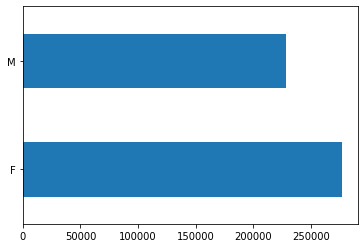

F    276572
M    228292
Name: ESTU_GENERO, dtype: int64


In [34]:
feq_m_f_20202.plot(kind='barh')
plt.show()
print(feq_m_f_20202)

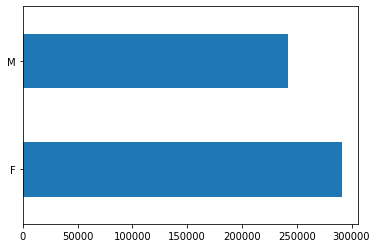

F    291037
M    241850
Name: ESTU_GENERO, dtype: int64


In [35]:
feq_m_f_20212.plot(kind='barh')
plt.show()
print(feq_m_f_20212)

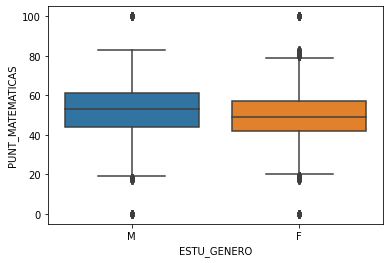

In [36]:
sns.boxplot(x=math_20202['ESTU_GENERO'], y=math_20202['PUNT_MATEMATICAS'], data=math_20202)
plt.show()

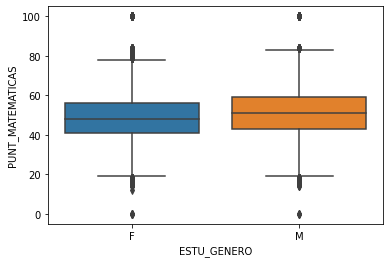

In [37]:
sns.boxplot(x=math_20212['ESTU_GENERO'], y=math_20212['PUNT_MATEMATICAS'], data=math_20212)
plt.show()

<function matplotlib.pyplot.show>

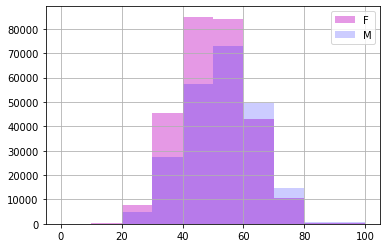

In [38]:
math_20202[math_20202['ESTU_GENERO']=='F']['PUNT_MATEMATICAS'].hist(alpha=0.4, color='m')
math_20202[math_20202['ESTU_GENERO']=='M']['PUNT_MATEMATICAS'].hist(alpha=0.2, color='b')
plt.legend(['F', 'M'])
plt.show

<function matplotlib.pyplot.show>

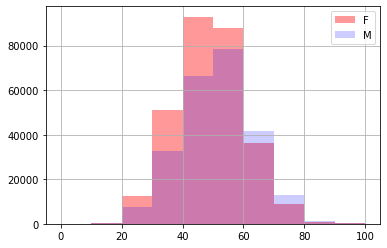

In [39]:
math_20212[math_20212['ESTU_GENERO']=='F']['PUNT_MATEMATICAS'].hist(alpha=0.4, color='r')
math_20212[math_20212['ESTU_GENERO']=='M']['PUNT_MATEMATICAS'].hist(alpha=0.2, color='b')
plt.legend(['F', 'M'])
plt.show



---



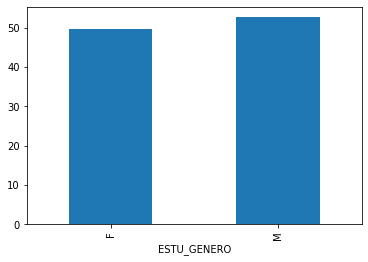

In [40]:
math_mean_20202 = math_20202.groupby(['ESTU_GENERO'])['PUNT_MATEMATICAS'].mean()
math_mean_20202.plot(kind='bar')
plt.show()

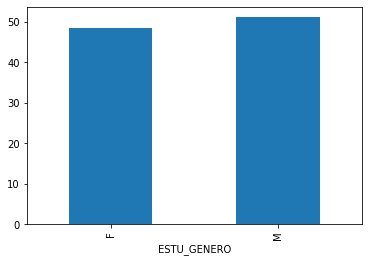

In [41]:
math_mean_20212 = math_20212.groupby(['ESTU_GENERO'])['PUNT_MATEMATICAS'].mean()
math_mean_20212.plot(kind='bar')
plt.show()

# Análisis con varias variables
*Ahora se combinan las variables de Género, Departamento y Puntuación Matemáticas para analizar si la media de la puntuación en matemáticas prevalece a través de los departamentos en Colombia.*

In [42]:
filter_by_female_20202 = math_20202[math_20202['ESTU_GENERO']=='F'] # para filtrar del dataset solo mas mujeres
filter_by_male_20202 = math_20202[math_20202['ESTU_GENERO']=='M'] # para filtrar del dataset solo los hombres
mean_depto_by_female_20202=filter_by_female_20202.groupby('ESTU_DEPTO_RESIDE')['PUNT_MATEMATICAS'].mean()
mean_depto_by_male_20202=filter_by_male_20202.groupby('ESTU_DEPTO_RESIDE')['PUNT_MATEMATICAS'].mean()

## print(mean_depto_by_female_20202.sort_values(ascending=False))
## print(mean_depto_by_male_20202.sort_values(ascending=False))

# Calculo de medias

*Diferencia de medias de género por departamento*




In [43]:
gap_math_20202 = mean_depto_by_male_20202 - mean_depto_by_female_20202
## print(gap_math_20202)

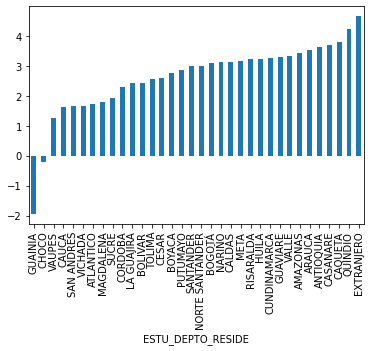

In [44]:
gap_math_20202.sort_values().plot.bar()
plt.show()

In [45]:
print("La brecha máxima en matemáticas para el periodo 2020-2 es", gap_math_20202.max())
print("La brecha mínima en matemáticas para el periodo 2020-2 es", gap_math_20202.min())
print("La desviación estándar de la brecha el periodo 2020-2 es", gap_math_20202.std())
print("La varianza de la brecha en matemáticas para el periodo 2020-2 es", gap_math_20202.var())

La brecha máxima en matemáticas para el periodo 2020-2 es 4.6555555555555586
La brecha mínima en matemáticas para el periodo 2020-2 es -1.9461126276412841
La desviación estándar de la brecha el periodo 2020-2 es 1.242851708653397
La varianza de la brecha en matemáticas para el periodo 2020-2 es 1.5446803697026683


In [46]:
filter_by_female_20212 = math_20212[math_20212['ESTU_GENERO']=='F']
filter_by_male_20212 = math_20212[math_20212['ESTU_GENERO']=='M']
mean_depto_by_female_20212=filter_by_female_20212.groupby('ESTU_DEPTO_RESIDE')['PUNT_MATEMATICAS'].mean()
mean_depto_by_male_20212=filter_by_male_20212.groupby('ESTU_DEPTO_RESIDE')['PUNT_MATEMATICAS'].mean()

# print(mean_depto_by_female_20212.sort_values(ascending=False))
# print(mean_depto_by_male_20212.sort_values(ascending=False))

In [47]:
gap_math_20212 = mean_depto_by_male_20212 - mean_depto_by_female_20212
# print(gap_math_20212)

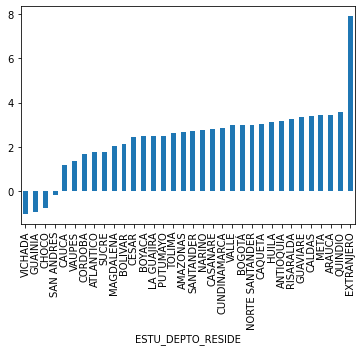

In [48]:
gap_math_20212.sort_values().plot.bar()
plt.show()

In [49]:
print("La brecha máxima en matemáticas para el periodo 2021-2 es", gap_math_20212.max())
print("La brecha mínima en matemáticas para el periodo 2021-2 es", gap_math_20212.min())
print("La desviación estándar de la brecha el periodo 2021-2 es", gap_math_20212.std())
print("La varianza de la brecha en matemáticas para el periodo 2021-2 es", gap_math_20212.var())

La brecha máxima en matemáticas para el periodo 2021-2 es 7.901785714285715
La brecha mínima en matemáticas para el periodo 2021-2 es -1.0356121326418375
La desviación estándar de la brecha el periodo 2021-2 es 1.5923338828288578
La varianza de la brecha en matemáticas para el periodo 2021-2 es 2.5355271944048265


In [50]:
math_20202.groupby(['ESTU_GENERO','ESTU_NSE_INDIVIDUAL'])['PUNT_MATEMATICAS'].mean()

ESTU_GENERO  ESTU_NSE_INDIVIDUAL
F            1.0                    44.376535
             2.0                    47.375653
             3.0                    52.406533
             4.0                    60.113853
M            1.0                    46.675247
             2.0                    49.984384
             3.0                    54.885126
             4.0                    61.837512
Name: PUNT_MATEMATICAS, dtype: float64

In [51]:
math_20212.groupby(['ESTU_GENERO','ESTU_NSE_INDIVIDUAL'])['PUNT_MATEMATICAS'].mean()

ESTU_GENERO  ESTU_NSE_INDIVIDUAL
F            1.0                    43.486564
             2.0                    46.237507
             3.0                    51.244396
             4.0                    59.422746
M            1.0                    45.469038
             2.0                    48.437141
             3.0                    53.304335
             4.0                    61.026233
Name: PUNT_MATEMATICAS, dtype: float64

# Construcción mapas

Los archivos de datos son descargados del portal del dane
[Marco Geoestadistico Nacional (MGN)](https://geoportal.dane.gov.co/servicios/descarga-y-metadatos/descarga-mgn-marco-geoestadistico-nacional/)

In [52]:
!pip install geopandas
import geopandas as gpd

In [53]:
file = '/content/drive/MyDrive/wom-en stem project/MGN2020_DPTO_POLITICO/MGN_DPTO_POLITICO.shp'
map = gpd.read_file(file)
map.columns


Index(['DPTO_CCDGO', 'DPTO_CNMBR', 'DPTO_NANO_', 'DPTO_CACTO', 'DPTO_NANO',
       'SHAPE_AREA', 'SHAPE_LEN', 'geometry'],
      dtype='object')

In [92]:
map['DPTO_CCDGO'] = map['DPTO_CCDGO'].astype('int')

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   DPTO_CCDGO  33 non-null     object  
 1   DPTO_CNMBR  33 non-null     object  
 2   DPTO_NANO_  33 non-null     int64   
 3   DPTO_CACTO  33 non-null     object  
 4   DPTO_NANO   33 non-null     int64   
 5   SHAPE_AREA  33 non-null     float64 
 6   SHAPE_LEN   33 non-null     float64 
 7   geometry    33 non-null     geometry
dtypes: float64(2), geometry(1), int64(2), object(3)
memory usage: 2.2+ KB


In [103]:
map = map[['DPTO_CCDGO','DPTO_CNMBR', 'SHAPE_AREA', 'SHAPE_LEN', 'geometry']]

In [106]:
groupby_depto_2020 = math_20202.groupby(['COLE_COD_DEPTO_UBICACION'])[['PUNT_MATEMATICAS']].mean()
math_20202['mean_depto_math'] = math_20202.groupby(['COLE_COD_DEPTO_UBICACION'])[['PUNT_MATEMATICAS']].transform('mean')
math_mean_20202 = math_20202[['COLE_COD_DEPTO_UBICACION', 'ESTU_GENERO', 'mean_depto_math']]
math_mean_20202 = math_mean_20202.drop_duplicates(subset=['COLE_COD_DEPTO_UBICACION'])
merge_map_math_mean_2020 = pd.merge(math_mean_20202, map , how='left', left_on='COLE_COD_DEPTO_UBICACION', right_on='DPTO_CCDGO')
merge_map_math_mean_2020.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,COLE_COD_DEPTO_UBICACION,ESTU_GENERO,mean_depto_math,DPTO_CCDGO,DPTO_CNMBR,SHAPE_AREA,SHAPE_LEN,geometry
0,17,M,51.013277,17,CALDAS,0.605498,6.655844,"POLYGON ((-74.67154 5.77147, -74.67054 5.76896..."
1,11,F,54.910477,11,"BOGOTÁ, D.C.",0.132208,3.760453,"POLYGON ((-74.07419 4.83655, -74.07401 4.83647..."
2,73,M,49.570133,73,TOLIMA,1.965027,9.549726,"POLYGON ((-74.82173 5.31671, -74.82156 5.31653..."
3,20,F,49.316756,20,CESAR,1.857960,12.611247,"POLYGON ((-73.45374 10.86767, -73.45358 10.867..."
4,5,F,49.638535,5,ANTIOQUIA,5.134915,21.443760,"POLYGON ((-76.41355 8.87383, -76.40465 8.85195..."
